# 範例 : (Kaggle)房價預測

# [教學目標]
- 以下用房價預測資料, 練習特徵重要性的寫作與觀察
- 由於只有樹狀模型有特徵重要性, 故以隨機森林為模型作為範例

# [範例重點]
- 使用擬合過的模型, 計算特徵重要性 (In[4], Out[4]) 
- 對照原始特徵, 觀察特徵重要性較高的一半特徵, 搭配隨機森林對於測結果的影響 (In[5], Out[5], In[6], Out[6])
- 重組重要性最高的特徵作為新特徵, 觀察效果如何 (In[9], Out[9]) 

In [3]:
# 請先確認您的 sklearn 版本是否相同, 如果版本不是 0.21.1 版, 有可能跑出與本範例不同的結果
import sklearn
sklearn.__version__

'0.19.0'

In [6]:
# 做完特徵工程前的所有準備
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

data_path = '../data/'
df = pd.read_csv(data_path + 'house_train.csv.gz')

train_Y = np.log1p(df['SalePrice'])
df = df.drop(['Id', 'SalePrice'] , axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [7]:
# 因為需要把類別型與數值型特徵都加入, 故使用最簡版的特徵工程

LEncoder = LabelEncoder() #類別型
MMEncoder = MinMaxScaler() #數值型

for c in df.columns:
    df[c] = df[c].fillna(-1)
    if df[c].dtype == 'object':
        df[c] = LEncoder.fit_transform(list(df[c].values))
    df[c] = MMEncoder.fit_transform(df[c].values.reshape(-1, 1))
df.head()

/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.235294,0.75,0.210191,0.033420,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,1.0,0.8
1,0.000000,0.75,0.257962,0.038795,1.0,0.0,1.0,1.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.25,1.0,0.8
2,0.235294,0.75,0.219745,0.046507,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.727273,0.50,1.0,0.8
3,0.294118,0.75,0.194268,0.038561,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.00,1.0,0.0
4,0.235294,0.75,0.270701,0.060576,1.0,0.0,0.0,1.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.50,1.0,0.8


In [8]:
# 隨機森林擬合後, 將結果依照重要性由高到低排序
estimator = RandomForestRegressor()
estimator.fit(df.values, train_Y)
# estimator.feature_importances_ 就是模型的特徵重要性, 這邊先與欄位名稱結合起來, 才能看到重要性與欄位名稱的對照表
feats = pd.Series(data=estimator.feature_importances_, index=df.columns)
feats = feats.sort_values(ascending=False)
feats

OverallQual      0.546403
GrLivArea        0.110232
GarageCars       0.055651
TotalBsmtSF      0.049334
1stFlrSF         0.022630
YearBuilt        0.018827
BsmtFinSF1       0.018809
GarageArea       0.017628
CentralAir       0.014435
LotArea          0.013529
MSZoning         0.010727
OverallCond      0.010025
YearRemodAdd     0.007679
BsmtUnfSF        0.006924
2ndFlrSF         0.005303
GarageYrBlt      0.005087
GarageType       0.004968
Fireplaces       0.004848
Neighborhood     0.004433
FireplaceQu      0.004378
MoSold           0.004185
FullBath         0.003599
LotFrontage      0.003543
OpenPorchSF      0.003517
KitchenQual      0.003061
ExterCond        0.002408
YrSold           0.002353
Heating          0.002333
EnclosedPorch    0.002216
MasVnrArea       0.002145
                   ...   
GarageQual       0.000865
Alley            0.000847
Foundation       0.000816
SaleType         0.000793
MasVnrType       0.000766
HouseStyle       0.000734
BsmtFinSF2       0.000507
LotConfig   

In [9]:
# 原始特徵 + 隨機森林
train_X = MMEncoder.fit_transform(df)
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.85530327987417698

In [10]:
# 高重要性特徵 + 隨機森林 (39大約是79的一半)
high_feature = list(feats[:39].index)
train_X = MMEncoder.fit_transform(df[high_feature])
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.85505830124544835

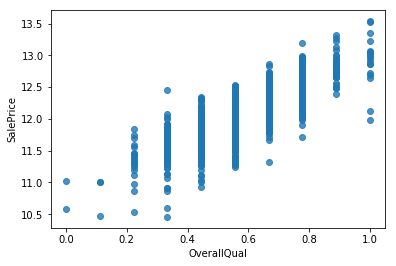

In [11]:
# 觀察重要特徵與目標的分布
# 第一名 : OverallQual              
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x=df['OverallQual'], y=train_Y, fit_reg=False)
plt.show()

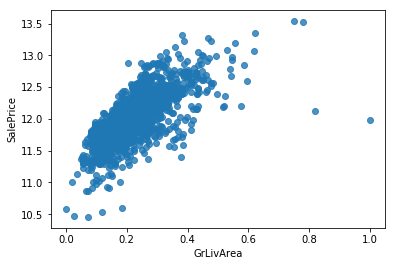

In [12]:
# 第二名 : GrLivArea
sns.regplot(x=df['GrLivArea'], y=train_Y, fit_reg=False)
plt.show()

In [9]:
# 製作四特徵 : 加, 乘, 互除(分母加1避免除0) 看效果 (Note: 數值原本已經最大最小化介於 [0,1] 區間, 這四種新特徵也會落在 [0,1] 區間)
df['Add_char'] = (df['GrLivArea'] + df['OverallQual']) / 2
df['Multi_char'] = df['GrLivArea'] * df['OverallQual']
df['GO_div1p'] = df['GrLivArea'] / (df['OverallQual']+1) * 2
df['OG_div1p'] = df['OverallQual'] / (df['GrLivArea']+1) * 2
train_X = MMEncoder.fit_transform(df)
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8559552209875323

# df_test

In [13]:
df_test = pd.read_csv(data_path + 'house_test.csv.gz')
ids = df_test['Id']
df_test = df_test.drop(['Id'] , axis=1)

In [14]:
LEncoder = LabelEncoder() #類別型
MMEncoder = MinMaxScaler() #數值型

In [17]:
for c in df_test.columns:
    df_test[c] = df_test[c].fillna(-1)
    if df_test[c].dtype == 'object':
        df_test[c] = LEncoder.fit_transform(list(df_test[c].values))
    df_test[c] = MMEncoder.fit_transform(df_test[c].values.reshape(-1, 1))

/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [18]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.000000,0.6,0.402985,0.184147,1.0,0.0,1.0,1.000000,1.0,1.0,...,0.208333,0.0,0.0,0.75,0.000000,0.000000,0.454545,1.0,1.0,0.8
1,0.000000,0.8,0.407960,0.232124,1.0,0.0,0.0,1.000000,1.0,0.0,...,0.000000,0.0,0.0,0.00,0.333333,0.735294,0.454545,1.0,1.0,0.8
2,0.235294,0.8,0.373134,0.224197,1.0,0.0,0.0,1.000000,1.0,1.0,...,0.000000,0.0,0.0,0.75,0.000000,0.000000,0.181818,1.0,1.0,0.8
3,0.235294,0.8,0.393035,0.154326,1.0,0.0,0.0,1.000000,1.0,1.0,...,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.454545,1.0,1.0,0.8
4,0.588235,0.8,0.218905,0.064121,1.0,0.0,0.0,0.333333,1.0,1.0,...,0.250000,0.0,0.0,0.00,0.000000,0.000000,0.000000,1.0,1.0,0.8


In [19]:
test_X = MMEncoder.fit_transform(df_test)

In [21]:
pred = estimator.predict(test_X)
sub = pd.DataFrame({'Id': ids, 'SalePrice': pred})
sub.to_csv('../submission/house_baseline31.csv', index=False) 

In [22]:
sub.shape

(1459, 2)

## 先用隨機森林對鐵達尼生存預測做訓練，再用其特徵重要性回答下列問題

# 作業1
* 將特徵重要性較低的一半特徵刪除後，再做生存率預估，正確率是否有變化?

# 作業2
* 將特徵重要性最高的兩個特徵做特徵組合，是否能再進一步提升預測力?